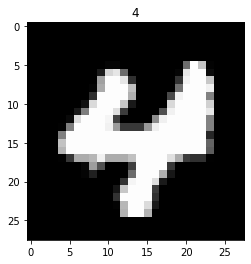

In [2]:
import numpy as np
import matplotlib.pyplot as plt
train_images = np.loadtxt('../lab2/data/train_images.txt')
train_labels = np.loadtxt('../lab2/data/train_labels.txt', 'float').astype(np.int)
test_images = np.loadtxt('../lab2/data/test_images.txt')
test_labels = np.loadtxt('../lab2/data/test_labels.txt', 'float').astype(np.int)

image = train_images[0, :]
image = np.reshape(image, (28, 28))
plt.title(train_labels[0])
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [22]:
def L1(img, imgs):
    return np.sum(np.abs(img - imgs), axis=1)

def L2(img, imgs):
    return np.sqrt(np.sum(np.power(img - imgs, 2), axis=1))

class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def fit(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        # 1. Calculati distanta de la test_image la toate train_images -> [201, 2001, 842, 723, ...] (np.linalg.norm - calculeaza norma L1 sau L2 sau altele)
        if metric == 'l1':
            dists = L1(test_image, self.train_images)
        else:
            dists = L2(test_image, self.train_images)
        # 2. Sortam arrayul de distante crescator pastrand indicii (np.argsort - returneaza indicii in ordinea valorilor sortate)
        indexes = np.argsort(dists)
        # 3. Luam primii num_neighbours din array-ul sortat -> [3, 3, 2]
        k_dists = indexes[:num_neighbors]
        # 4. Numaram clasa dominanta -> 3  (np.bincount - numara cate aparitii de fiecare valoare exista) (np.argmax - returneaza indicele cu valoarea cea mai mare)
        k_classes = self.train_labels[k_dists]
        k_votes = np.bincount(k_classes)
        return np.argmax(k_votes)

    def predict(self, test_images, num_neighbors=3, metric='l2'):
        preds = []
        for test_image in test_images:
            preds.append(self.classify_image(test_image, num_neighbors, metric))
        return preds

    def score(self, test_images, test_labels, num_neighbors=3, metric='l2'):
        preds = self.predict(test_images, num_neighbors, metric)

        return (preds == test_labels).mean()

knn = KnnClassifier(train_images, train_labels)
# print(knn.classify_image(test_images[9]))
knn.score(test_images, test_labels)

0.898

In [23]:
acc_l1 = [knn.score(test_images, test_labels, num_neighbors=x, metric='l1') for x in [1, 3, 5, 7, 9]]
acc_l2 = [knn.score(test_images, test_labels, num_neighbors=x, metric='l2') for x in [1, 3, 5, 7, 9]]

In [27]:
print(acc_l1)
print(acc_l2)

[0.88, 0.884, 0.868, 0.864, 0.864]
[0.884, 0.898, 0.896, 0.88, 0.88]


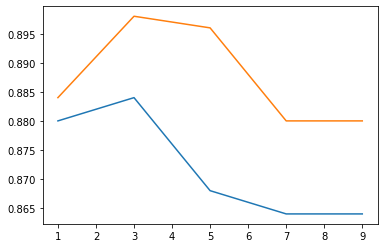

In [26]:
ks = [1, 3, 5, 7, 9]
plt.plot(ks, acc_l1)
plt.plot(ks, acc_l2)
plt.show()